In [15]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import sys
sys.path.append('/Users/krishna/MOOC/MixtureSVM/src/helper_utils')
from utils import load_array
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

Using TensorFlow backend.


In [10]:
PATH = '/Users/krishna/MOOC/MixtureSVM/data/mnist/'
TRAIN = PATH + 'train/500/'
TEST = PATH + 'test/500/'
VAL = PATH + 'val/500/'

x_train = load_array(TRAIN + 'x_train.bc/')
y_train = load_array(TRAIN + 'y_train.bc/')

x_test = load_array(TEST + 'x_test.bc/')
y_test = load_array(TEST + 'y_test.bc/')

x_val = load_array(VAL + 'x_val.bc/')
y_val = load_array(VAL + 'y_val.bc/')

7

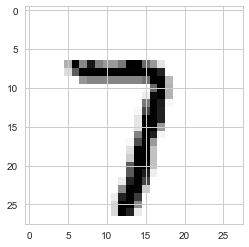

In [36]:
plt.imshow(X[7])
y[7]

In [16]:
img_rows, img_cols = 28, 28
num_pixels = img_rows * img_cols

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_val = np_utils.to_categorical(y_val, 10)

x_train /= 255
x_test /= 255
x_val /= 255

mean_image = np.mean(x_train, axis=0)
x_train -= mean_image
x_test -= mean_image
x_val -= mean_image

In [19]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(200, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [39]:
model.fit(x_train, y_train, batch_size=256, verbose=1,
              validation_data=(x_val, y_val), epochs=30)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 2s - loss: 0.0221 - acc: 0.9944 - val_loss: 0.0796 - val_acc: 0.9775

In [40]:
yhats_train = model.predict(x_train, batch_size=256)

In [43]:
yhats_train[7]

array([  3.92150860e-18,   2.56592122e-12,   7.24592099e-14,
         8.11872444e-12,   1.30763311e-23,   1.18308436e-23,
         6.45827542e-26,   1.00000000e+00,   7.95075458e-19,
         7.26961368e-16], dtype=float32)

In [42]:
y_train[7]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])